<a href="https://colab.research.google.com/github/Atifa14/EDGE-project-09/blob/main/Final_Project09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print ("Atifa")

Atifa


#Data Collection and Storage


In [4]:
import csv

In [11]:
with open("student_data.csv", "w", newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Student ID", "Student Name", "Subject", "Score", "Attendance Percentage", "Assignment Completion"])

In [2]:
def add_record():

  with open("student_data.csv", "a") as file:
      writer = csv.writer(file)


      student_id = input("Enter Student ID : ")
      student_name = input("Enter Student Name: ")
      subject = input("Enter Subject: ")
      score = input("Enter Score: ")
      attendance = input("Enter Attendance Percentage: ")
      assignment = input("Enter Assignment Completion (Yes/No): ")
      writer.writerow([student_id, student_name, subject, score, attendance, assignment])

      file.close()

      print("Data written to student_data.csv")

In [1]:
with open("student_data.csv", "r") as file:
    print(file.read())

Student ID,Student Name,Subject,Score,Attendance Percentage,Assignment Completion
001,Atifa,PHY,87,90,Yes
001,Atifa,ANP,85,90,Yes
001,Atifa,EEE,56,85,No
002,Kafi,SWE,84,89,No
002,Kafi,EEE,78,75,Yes
003,Tarin,LLB,65,86,Yes
003,Tarin,ENG,75,50,No
004,Bela,BNG,90,90,Yes
004,Bela,ENG,40,65,No
005,Nishat,OCG,58,50,No
005,Nishat,SOC,60,50,No



In [3]:
while True:
  print("Menu")
  print("1. Add Record")
  print("2. Search Record")
  print("3. Update Record")
  print("4. Delete Record")
  print("5. Exit")
  choice = input("Enter your choice: (1-5) ")

  if choice == "1":
    add_record()
  if choice == "2":
    search_record()
  if choice == "3":
    update_record()
  if choice == "4":
    delete_record()
  if choice == "5":
    exit()
    break

Menu
1. Add Record
2. Search Record
3. Update Record
4. Delete Record
5. Exit
Enter your choice: (1-5) 5


#Read CSV

In [1]:
def getinfo(student_id):
  with open("student_data.csv", "r") as file:
    reader = csv.reader(file)
    for row in reader:
      if row[0] == student_id:
       return row

In [4]:
print(getinfo("001"))

['001', 'Atifa', 'PHY', '87', '90', 'Yes']


#Modify Score

In [7]:
def modify_score():
  student_id = input("Enter Student ID to modify: ")
  subject= input("Enter Subject to modify: ")
  with open("student_data.csv", "r") as file:
    reader = csv.reader(file)
    data= list(reader)
    for row in data:
      if row[0] == student_id and row[2] == subject:
        row[3] = input("Enter new score: ")
        break
        print("Subject not found")
        break
  with open("student_data.csv", "w") as file:
    writer = csv.writer(file)
    writer.writerows(data)
    print("Score modified successfully")

In [8]:
while True:
  print("Menu")
  print("1. Modify Score")
  print("2. Exit")
  choice = input("Enter your choice: (1-2) ")

  if choice == "1":
    modify_score()
  if choice == "2":
    exit()
    break

Menu
1. Modify Score
2. Exit
Enter your choice: (1-2) 1
Enter Student ID to modify: 004
Enter Subject to modify: ENG
Enter new score: 50
Score modified successfully
Menu
1. Modify Score
2. Exit
Enter your choice: (1-2) 2


#Data Analysis and Manipulation

mean,min and max

In [1]:
import pandas as pd

In [2]:
data= pd.read_csv("student_data.csv")

In [3]:
data

,Student ID,Student Name,Subject,Score,Attendance Percentage,Assignment Completion
0,1,Atifa,PHY,85,90,Yes
1,1,Atifa,ANP,85,90,Yes
2,1,Atifa,EEE,56,85,No
3,2,Kafi,SWE,84,89,No
4,2,Kafi,EEE,78,75,Yes
5,3,Tarin,LLB,65,86,Yes
6,3,Tarin,ENG,75,50,No
7,4,Bela,BNG,90,90,Yes
8,4,Bela,ENG,50,65,No
9,5,Nishat,OCG,58,50,No


In [4]:
student_stats= data.groupby(['Student ID','Student Name'])['Score'].agg(['mean', 'max', 'min'])
student_stats = student_stats.rename(columns={
    'mean': 'Average Score',
    'max': 'Highest Score',
    'min': 'Lowest Score'
})
print(student_stats)

                         Average Score  Highest Score  Lowest Score
Student ID Student Name                                            
1          Atifa             75.333333             85            56
2          Kafi              81.000000             84            78
3          Tarin             70.000000             75            65
4          Bela              70.000000             90            50
5          Nishat            59.000000             60            58


Attendence <75% or missing assignments

In [5]:
low_attendence_or_missing_assignments = data[(data['Attendance Percentage'] < 75) | (data['Assignment Completion'] == 'No')]
print(low_attendence_or_missing_assignments)

    Student ID Student Name Subject  Score  Attendance Percentage  \
2            1        Atifa     EEE     56                     85   
3            2         Kafi     SWE     84                     89   
6            3        Tarin     ENG     75                     50   
8            4         Bela     ENG     50                     65   
9            5       Nishat     OCG     58                     50   
10           5       Nishat     SOC     60                     50   

   Assignment Completion  
2                     No  
3                     No  
6                     No  
8                     No  
9                     No  
10                    No  


Filter students failing a subject

In [10]:
data['Score'] = pd.to_numeric(data['Score'])
failed_students = data[(data['Score'] < 60) & (data['Subject'] == 'ENG')][['Student ID','Student Name','Subject']]
print(failed_students)

   Student ID Student Name Subject
8           4         Bela     ENG


Convert score to integer

In [ ]:
if data['Score'].dtype == 'str':
  print("Score is stored as an string")
  if data['Score'].dtype
    data['Score'] = data['Score'].astype(int)

#Visualization

In [11]:
import matplotlib.pyplot as plt

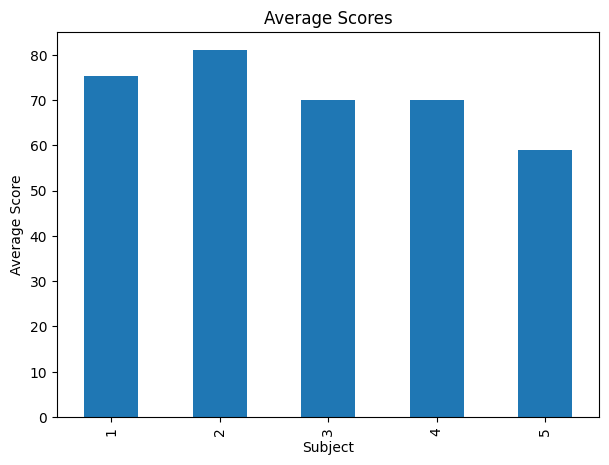

In [12]:
average_scores = data.groupby('Student ID')['Score'].mean()
average_scores.plot(kind='bar', title='Average Scores',figsize=(7,5))
plt.xlabel('Subject')
plt.ylabel('Average Score')
plt.show()

Pie chart of attendence